# SkyHack_2.0 Codes For Data Analysis and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('callsf0d4f5a.csv')
df2=pd.read_csv('sentiment_statisticscc1e57a.csv')
df3=pd.read_csv('reason18315ff.csv')
df4=pd.read_csv('customers2afd6ea.csv')
df1

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,08-01-2024 00:03,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,08-01-2024 00:07,08-01-2024 00:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,09-01-2024 00:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,09-01-2024 00:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,09-01-2024 00:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,09-01-2024 00:03,\n\nAgent: Thank you for calling United Airlin...


## ->Dataframe of Call File.

In [2]:
df1.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

### -> No Missing Values in Call File.

In [3]:
duplicate_rows = df1.duplicated()
print(f"Total Duplicates: {duplicate_rows.sum()}")


Total Duplicates: 0


## -> No Duplicate Values in Call File.

In [4]:
continuous_columns = df1.select_dtypes(include=['int64']).columns


continuous_columns_list = continuous_columns.tolist()

continuous_columns_list



['call_id', 'customer_id', 'agent_id']

## -> Separating Continuous Columns for Descriptive Stats.

In [5]:
continuous_data = df1[continuous_columns_list]
continuous_data.describe()


,call_id,customer_id,agent_id
count,7.181000e+04,7.181000e+04,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039
std,2.889673e+09,2.884255e+09,257532.362167
min,1.316420e+05,1.197800e+04,102574.000000
25%,2.480013e+09,2.514618e+09,347606.000000
50%,4.989448e+09,4.999664e+09,591778.000000
75%,7.493629e+09,7.509126e+09,786323.000000
max,9.999806e+09,9.999935e+09,993862.000000


### 1)With 71,810 unique calls, United Airlines manages a vast number of customer service interactions. This volume reflects the airline's global scale and operational complexity, dealing with various customer issues like flight bookings, changes, and cancellations.
### 2)The customer ID range from 11,978 to 9.99 billion shows a wide span, indicating both long-standing and new customers.
### 3)The agent ID range from 102,574 to 993,862 reveals that United Airlines employs a large and growing workforce to handle customer calls. The median agent ID of 591,778 suggests steady onboarding, likely to accommodate rising call volumes during peak seasons or emergencies.
### 4)The standard deviation in call and customer IDs (around 2.88 billion) suggests fluctuating demand, possibly tied to high-traffic periods like holidays or weather disruptions that require enhanced customer support.
### 5)The 75th percentile values for both call and customer IDs (around 7.5 billion) reflect the airline's ability to scale and handle a growing number of interactions over time, managing both new and recurring customer queries.
### 6)The near 1 million agent IDs signal that United Airlines has built a sizable support infrastructure, hiring agents as needed to meet rising customer demand, ensuring effective service during busy times.

In [3]:
df1['call_start_datetime'] = pd.to_datetime(df1['call_start_datetime'], format='mixed', dayfirst=True)
df1['agent_assigned_datetime'] = pd.to_datetime(df1['agent_assigned_datetime'], format='mixed', dayfirst=True)
df1['call_end_datetime'] = pd.to_datetime(df1['call_end_datetime'], format='mixed', dayfirst=True)



total_calls = df1['call_id'].nunique()

df1['handle_time'] = (df1['call_end_datetime'] - df1['agent_assigned_datetime']).dt.total_seconds() / 60  
df1['waiting_time'] = (df1['agent_assigned_datetime'] - df1['call_start_datetime']).dt.total_seconds() / 60  


total_handle_time = df1['handle_time'].sum()


total_waiting_time = df1['waiting_time'].sum()


average_handle_time = total_handle_time / total_calls

average_speed_to_answer = total_waiting_time / total_calls


print(f"Total Calls: {total_calls}")
print(f"Total Handle Time (minutes): {total_handle_time:.2f}")
print(f"Total Waiting Time (minutes): {total_waiting_time:.2f}")
print(f"Average Handle Time (AHT in minutes): {average_handle_time:.2f}")
print(f"Average Speed to Answer (AST in minutes): {average_speed_to_answer:.2f}")

Total Calls: 71810
Total Handle Time (minutes): -859189.00
Total Waiting Time (minutes): 1451897.00
Average Handle Time (AHT in minutes): -11.96
Average Speed to Answer (AST in minutes): 20.22


### 1)The call center handled a total of 71,810 calls, reflecting the scale of operations and the demand for customer support services.
### 2)The total handle time of -859,189 minutes appears incorrect, indicating potential data quality issues, such as negative values where they shouldn't be.This is because call end time is early then agent assigned datetime which produces inconsistency.
### 3)The total waiting time of 1,451,897 minutes is significant, suggesting that customers spend a substantial amount of time waiting before their calls are answered, indicating potential inefficiencies.
### 4)The AHT of -11.96 minutes is also concerning and suggests a data error. This is due to negative handle time.
### 5)The AST of 20.22 minutes is quite high, implying that customers wait a long time before speaking to an agent. This could severely impact customer satisfaction.

In [5]:
df1['handle_time'] = df1['handle_time'].apply(lambda x: 0 if x < 0 else x)
df1['waiting_time'] = df1['waiting_time'].apply(lambda x: 0 if x < 0 else x)

## -> Removing Negative values of handle time and waiting time and imputing it with 0 due to incorrect data entry.

In [9]:
df1

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,waiting_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-01-08 00:03:00,2024-01-08 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,0.0
1,1122072124,8186702651,519057,2024-01-08 00:03:00,2024-01-08 00:06:00,2024-01-08 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-01-08 00:07:00,2024-01-08 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,0.0
3,2266439882,1154544516,488324,2024-01-08 00:05:00,2024-01-08 00:10:00,2024-01-08 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0
4,1211603231,5214456437,721730,2024-01-08 00:04:00,2024-01-08 00:14:00,2024-01-08 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0
...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-01-09 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0.0,9.0
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-01-09 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0.0,3.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-01-09 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0.0,6.0
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-01-09 00:03:00,\n\nAgent: Thank you for calling United Airlin...,0.0,6.0


In [6]:

total_handle_time = df1['handle_time'].sum()
total_waiting_time = df1['waiting_time'].sum()


average_handle_time = total_handle_time / total_calls
average_speed_to_answer = total_waiting_time / total_calls

print(f"Average Handle Time (AHT in minutes): {average_handle_time:.2f}")
print(f"Average Speed to Answer (AST in minutes): {average_speed_to_answer:.2f}")

Average Handle Time (AHT in minutes): 68.48
Average Speed to Answer (AST in minutes): 37.94


## -> Calculating AHT(Average Handle Time) And AST(Average Speed to Answer) accurately.

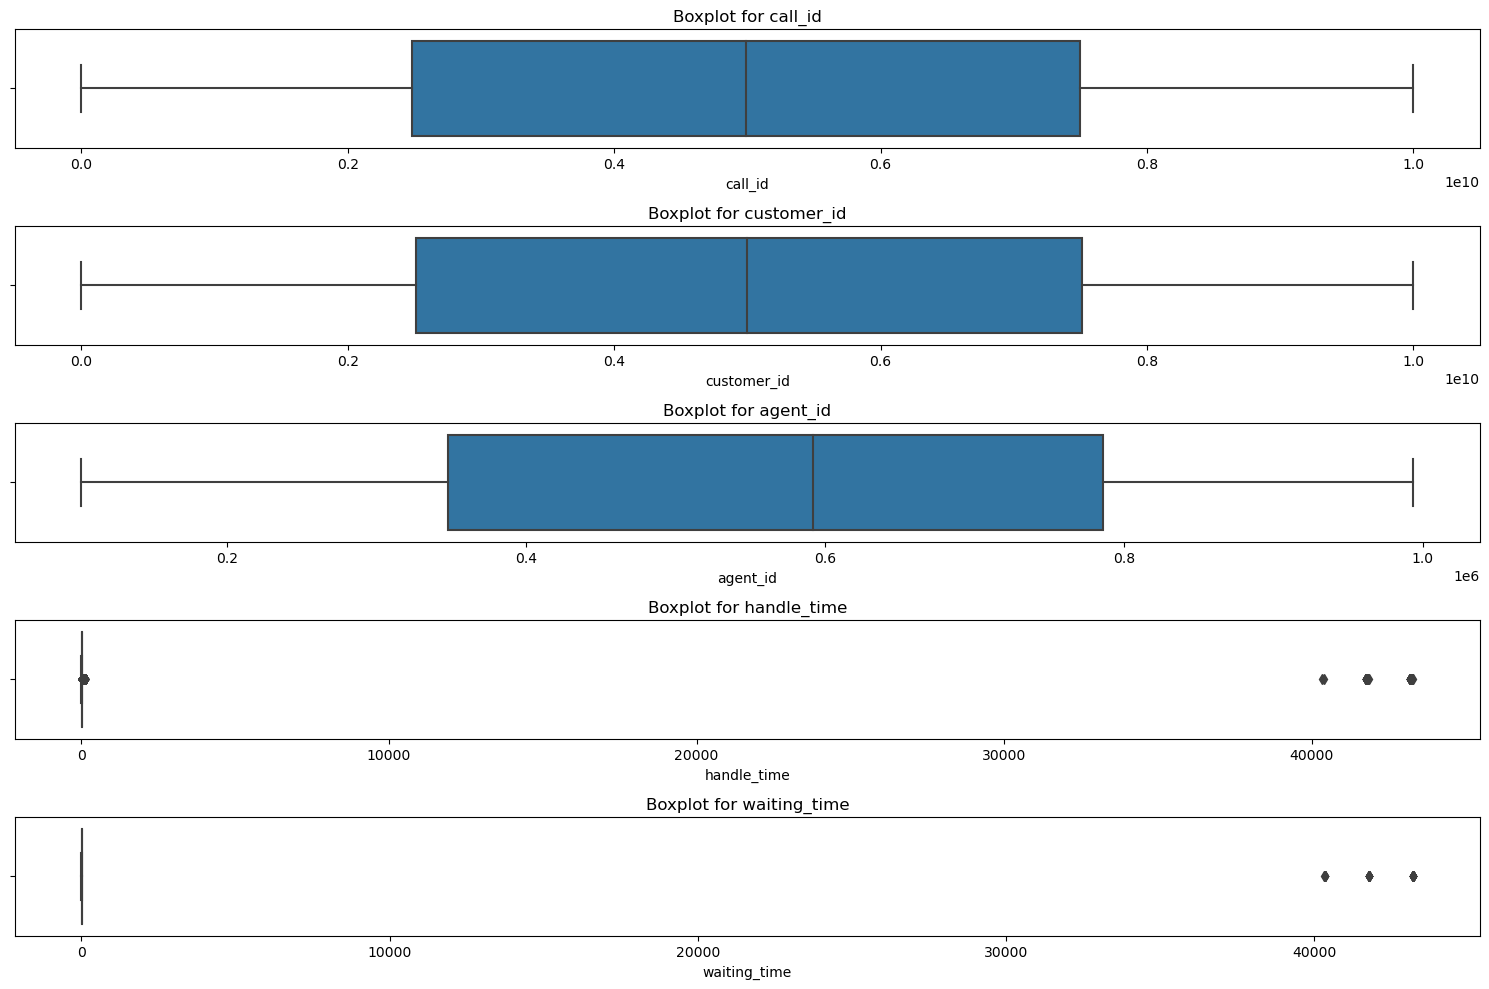

In [7]:
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

## 1) Boxplot visualization to remove outliers.
## 2) Handle Time and Waiting Time has outliers.

In [8]:

mask = pd.Series(True, index=df1.index)

for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

   
    mask &= (df1[col] >= lower_bound) & (df1[col] <= upper_bound)


df_no_outliers = df1[mask]


print(f"Original DataFrame shape: {df1.shape}")
print(f"Cleaned DataFrame shape (outliers removed): {df_no_outliers.shape}")


Original DataFrame shape: (71810, 9)
Cleaned DataFrame shape (outliers removed): (66643, 9)


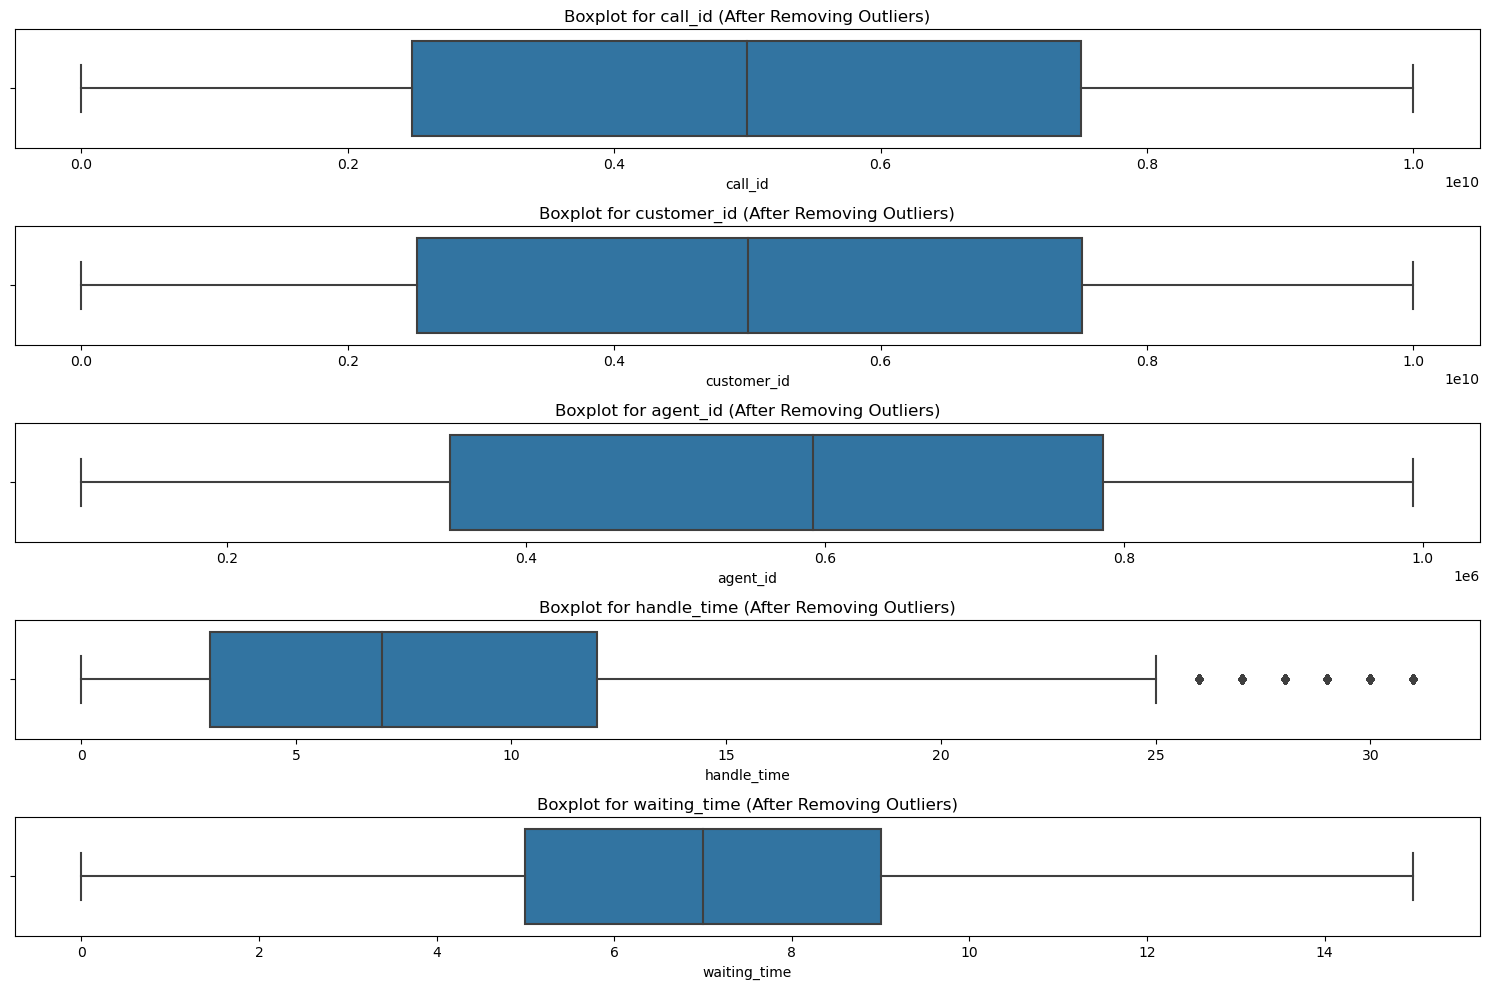

In [9]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot for {col} (After Removing Outliers)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


## -> Boxplot visualization to see remaining outliers.Handle Time still has outliers.

In [10]:

column_name = 'handle_time' 


Q1 = df_no_outliers[column_name].quantile(0.25)
Q3 = df_no_outliers[column_name].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"Number of outliers before filtering: {df_no_outliers[(df_no_outliers[column_name] < lower_bound) | (df_no_outliers[column_name] > upper_bound)].shape[0]}")


df_no_outliers = df_no_outliers[(df_no_outliers[column_name] >= lower_bound) & (df_no_outliers[column_name] <= upper_bound)]


print(f"Number of outliers after filtering: {df_no_outliers[(df_no_outliers[column_name] < lower_bound) | (df_no_outliers[column_name] > upper_bound)].shape[0]}")


Number of outliers before filtering: 2621
Number of outliers after filtering: 0


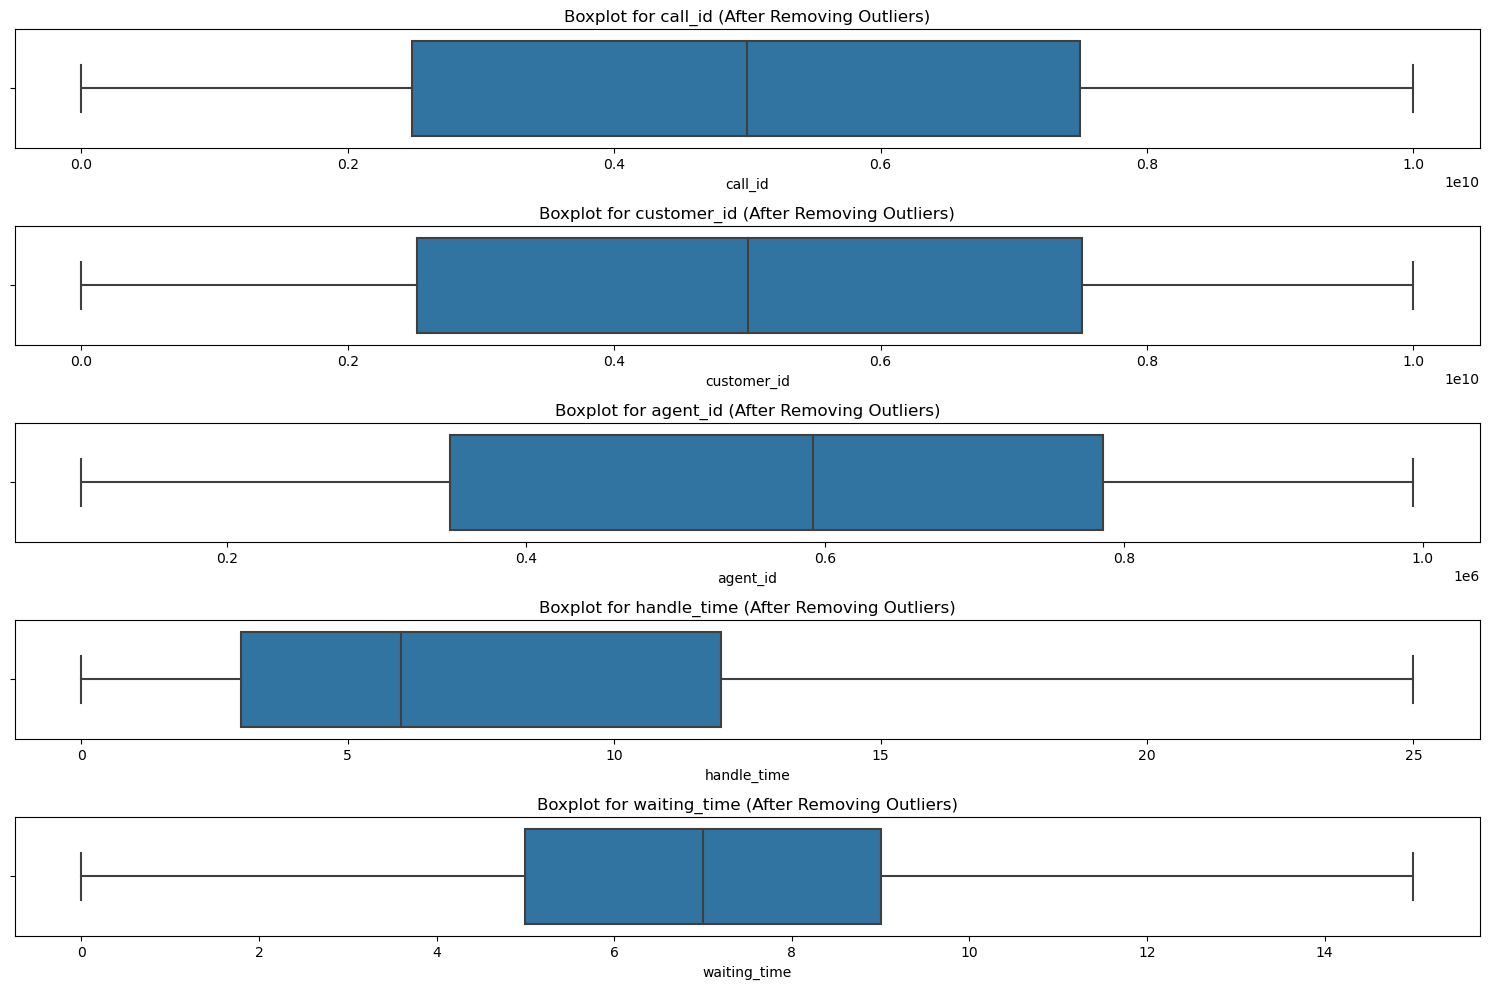

In [11]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot for {col} (After Removing Outliers)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


## -> Successfully all outliers removed from all numerical columns.

In [12]:
df2

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


## -> Dataframe of Sentiment File.

In [13]:
df2.isnull().sum()

call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64

## 1)Agent Tone has 217 missing values.
## 2)Average Sentiment has 109 missing values.

In [15]:
df2.dtypes

call_id                      int64
agent_id                     int64
agent_tone                  object
customer_tone               object
average_sentiment          float64
silence_percent_average    float64
dtype: object

In [14]:

df2['agent_tone'].replace(['', None, np.nan], np.nan, inplace=True) 
mode_agent_tone = df2['agent_tone'].mode()[0]  
df2['agent_tone'].fillna(mode_agent_tone, inplace=True)  e

median_sentiment = df2['average_sentiment'].median()
df2['average_sentiment'].fillna(median_sentiment, inplace=True)
df2.isnull().sum()

call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64

### 1) Repacing NAN values of Agent Tone column with Mode as it's a Categorical Column.
### 2) Repacing NAN values of Average Sentiment column with Median as it's a Continuous Column and has a lot of negative Sentiment Scores.

In [19]:
duplicate_rows = df2.duplicated()
print(f"Total Duplicates: {duplicate_rows.sum()}")


Total Duplicates: 0


## -> No Duplicates in Sentiment File.

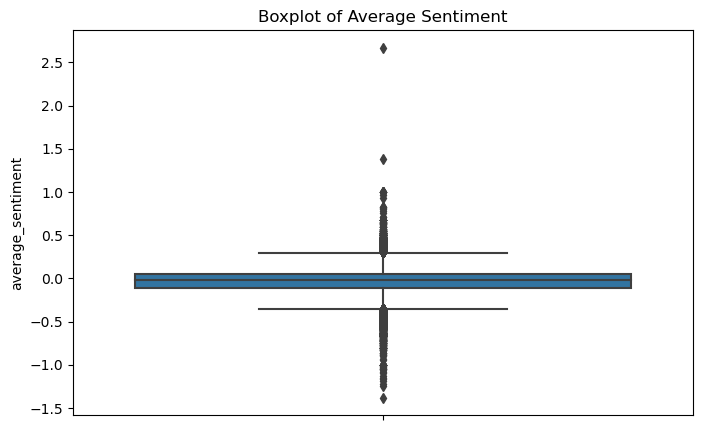

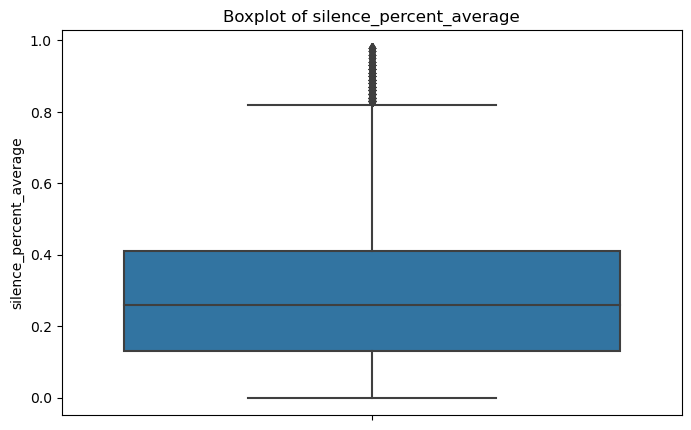

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['average_sentiment'])
plt.title('Boxplot of Average Sentiment')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['silence_percent_average'])
plt.title('Boxplot of silence_percent_average')
plt.show()

## -> Boxplot Visualization to remove outliers from Average Sentiment and Silent Percentage Average as both are Numerical Column and likelihood to have outliers.

In [16]:
def remove_outliers_iqr(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]


df2 = remove_outliers_iqr(df2, 'silence_percent_average')


df2 = remove_outliers_iqr(df2, 'average_sentiment')


print(df2)

          call_id  agent_id agent_tone customer_tone  average_sentiment  \
0      4667960400    963118    neutral         angry              -0.04   
1      1122072124    519057       calm       neutral               0.02   
2      6834291559    158319    neutral        polite              -0.13   
3      2266439882    488324    neutral    frustrated              -0.20   
4      1211603231    721730    neutral        polite              -0.05   
...           ...       ...        ...           ...                ...   
71805  1563273072    413148       calm          calm               0.05   
71806  8865997781    980156       calm    frustrated               0.03   
71807  8019240181    616988       calm        polite               0.05   
71808  8332067080    161354    neutral        polite              -0.07   
71809  8210720833    547592    neutral          calm               0.00   

       silence_percent_average  
0                         0.39  
1                         0.35  


## Applying IQR Method to remove outliers from Numerical Columns.

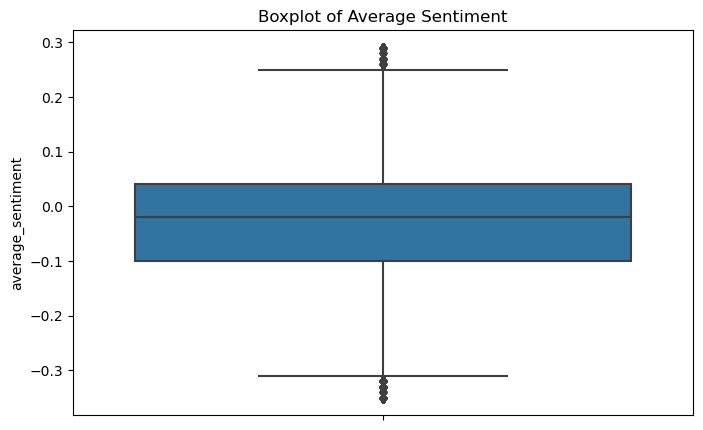

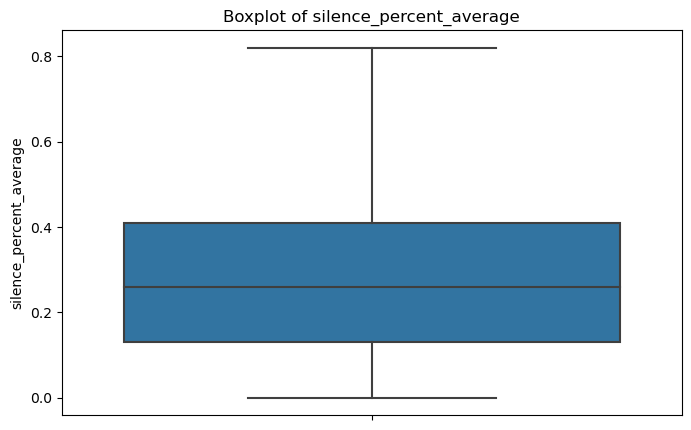

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['average_sentiment'])
plt.title('Boxplot of Average Sentiment')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['silence_percent_average'])
plt.title('Boxplot of silence_percent_average')
plt.show()

## -> Boxplot shows outliers are removed.

In [27]:
df2.describe()

,call_id,agent_id,average_sentiment,silence_percent_average
count,6.892600e+04,68926.000000,68926.000000,68926.000000
mean,4.995115e+09,564696.571439,-0.029197,0.284419
std,2.890551e+09,257436.944172,0.117424,0.187199
min,1.316420e+05,102574.000000,-0.350000,0.000000
25%,2.480826e+09,347606.000000,-0.100000,0.130000
50%,4.992447e+09,591778.000000,-0.020000,0.260000
75%,7.495861e+09,786323.000000,0.040000,0.410000
max,9.999669e+09,993862.000000,0.290000,0.820000


## Descriptive Stats of Sentiment Data.
### 1)The data captures information for 68,926 calls, reflecting a significant number of interactions handled by agents.
### 2)The average sentiment score is -0.03, indicating that overall customer interactions lean slightly toward negative or neutral experiences. This suggests room for improving customer satisfaction.
### 3)On average, 28.4% of each call's duration consists of silence, suggesting that nearly a third of the calls involve non-productive time. This could point to inefficiencies or delays during conversations.
### 4)The sentiment scores range from -0.35 to 0.29, with the lower quartile showing more negative sentiments (25% have -0.10 or lower), while some calls still exhibit positive or neutral tones.
### 5)There is a noticeable spread in the percentage of silence, with some calls having no silence and others going up to 82% silence, indicating varied levels of agent efficiency or customer engagement.
### 6)The agent IDs span from 102,574 to 993,862, with a standard deviation of 257,437, suggesting a wide range of agent involvement across these interactions, which could correlate with varying performance levels.

In [28]:
df3

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


## -> Datframe of Reason file.

In [29]:
df3.isnull().sum()

call_id                0
primary_call_reason    0
dtype: int64

## -> No Missing Values in Reason file.

In [30]:
duplicate_rows = df3.duplicated()
print(f"Total Duplicates: {duplicate_rows.sum()}")


Total Duplicates: 0


## -> No Duplicate Values in Data.

In [31]:
df4

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


## -> Datframe of Customer File.

In [18]:
df4.isnull().sum()

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

## -> Detected 25,767 Missing Values in Elite Level Code Column.

In [33]:
df4.dtypes

customer_id           int64
customer_name        object
elite_level_code    float64
dtype: object

In [19]:
df4['elite_level_code'].fillna(-1, inplace=True)
df4.isnull().sum()

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64

## -> Removing Missing Values by imputing NAN Values with -1.

In [35]:
duplicate_rows = df4.duplicated()
print(f"Total Duplicates: {duplicate_rows.sum()}")


Total Duplicates: 0


## -> No Duplicate Values in Customer Data.

In [36]:
df4.describe()

,customer_id,elite_level_code
count,7.181000e+04,71810.000000
mean,5.004334e+09,0.520150
std,2.884255e+09,1.553806
min,1.197800e+04,-1.000000
25%,2.514618e+09,-1.000000
50%,4.999664e+09,0.000000
75%,7.509126e+09,1.000000
max,9.999935e+09,5.000000


## Descriptive Stats of Customer Data.
### 1)The dataset includes 71,810 customers, reflecting a wide range of travellers interacting with the call centre.
### 2)The elite_level_code ranges from -1 to 5, with an average of 0.52. This suggests that many customers do not have elite status (as indicated by -1 and 0), but there is a notable segment of elite travelers.
### 3) About 50% of customers have an elite level of 0 or lower, indicating non-elite or basic-tier customers. The upper quartile (25%) has an elite level of 1 or higher, suggesting a significant portion of high-status travelers.
### 4)The elite level reaches a maximum of 5, which likely represents top-tier frequent flyers, who may require special attention and services.
### 5)The customer IDs range from 11,978 to almost 10 billion, reflecting the diverse and widespread nature of the airline’s customer base.
### 6)The standard deviation of 1.55 indicates a varied distribution of customer elite statuses, showing significant differences in customer loyalty and service needs.

In [20]:
df = pd.merge(df1, df2, on='call_id', how='left')
df = pd.merge(df, df3, on='call_id', how='left')
df = pd.merge(df, df4, on='customer_id', how='left')


## -> Merge sentiment, reason, Customer files with Call File.

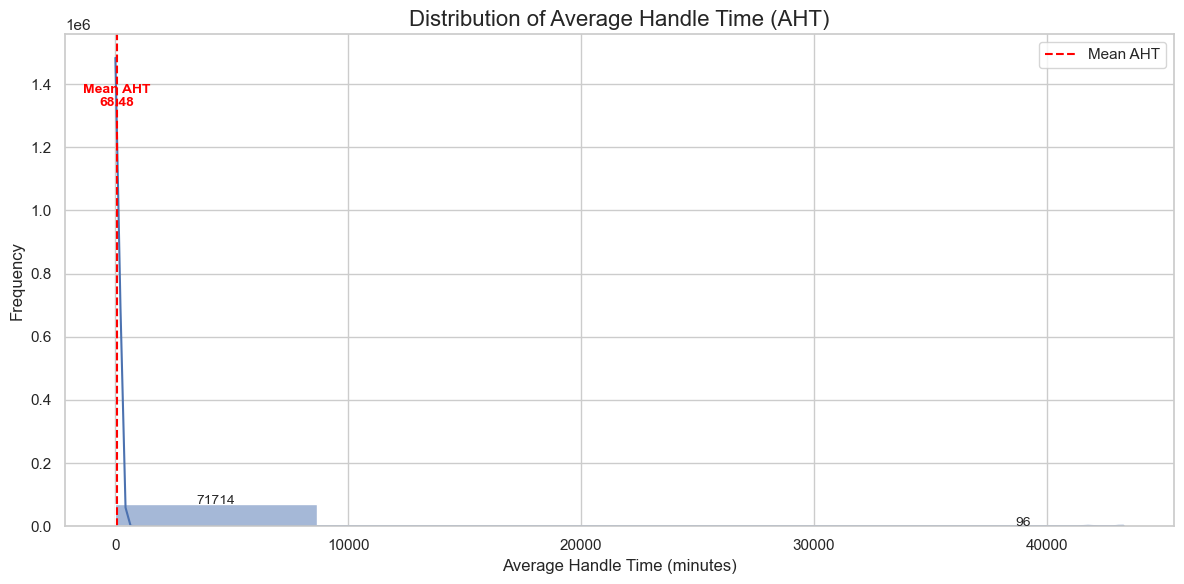

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['handle_time'], bins=5, kde=True)
plt.title('Distribution of Average Handle Time (AHT)', fontsize=16)
plt.xlabel('Average Handle Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


mean_aht = df['handle_time'].mean()


plt.axvline(mean_aht, color='red', linestyle='--', label='Mean AHT')


for patch in ax.patches:
    height = patch.get_height()
    if height > 0: 
        ax.text(patch.get_x() + patch.get_width() / 2, height + 0.5, 
                f'{int(height)}', ha='center', fontsize=10)


plt.text(mean_aht, ax.get_ylim()[1] * 0.9, f'Mean AHT\n{mean_aht:.2f}', 
         color='red', ha='center', va='top', fontsize=10, fontweight='bold')

plt.legend()
plt.tight_layout() 
plt.show()


### 1)The histogram shows that the Average Handle Time (AHT) is predominantly clustered between 0 and less than 10,000 minutes, but the mean AHT of 68,148 minutes raises concerns about potential inefficiencies in the call center's operations. Such a high average indicates that while many calls are resolved quickly, there are likely outliers contributing to lengthy handle times.
### 2)With a frequency of 71,714 calls falling within this AHT range, the call center is potentially burdened by a subset of calls that require excessive time to resolve. This could indicate issues such as complex customer inquiries, inadequate agent training, or insufficient self-service options, which could lead to frustration for both agents and customers.
### 3)By identifying the root causes of prolonged handle times, such as common call types or customer issues, the organization can implement targeted strategies to streamline processes, enhance agent training, and improve self-service options. This proactive approach could help in reducing the mean AHT and improving overall customer satisfaction.

In [42]:
df.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'handle_time', 'waiting_time', 'agent_id_y', 'agent_tone',
       'customer_tone', 'average_sentiment', 'silence_percent_average',
       'primary_call_reason', 'customer_name', 'elite_level_code'],
      dtype='object')

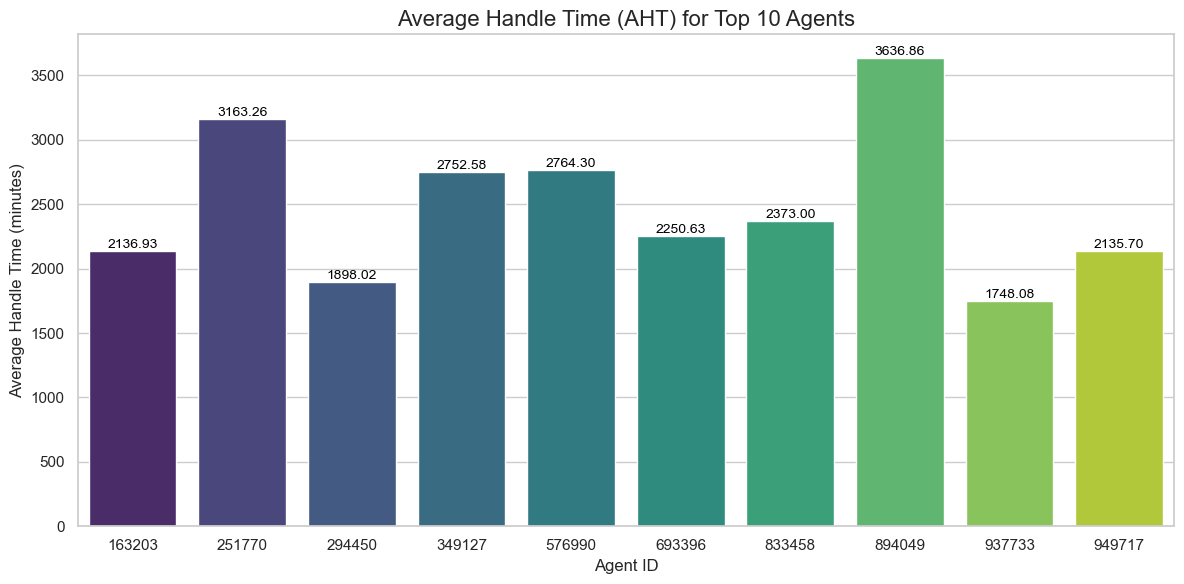

In [50]:

top_agents = df.groupby('agent_id_x')['handle_time'].mean().reset_index()


top_agents = top_agents.sort_values(by='handle_time', ascending=False).head(10)




plt.figure(figsize=(12, 6))
ax = sns.barplot(x='agent_id_x', y='handle_time', data=top_agents, palette='viridis')
plt.title('Average Handle Time (AHT) for Top 10 Agents', fontsize=16)
plt.xlabel('Agent ID', fontsize=12)
plt.ylabel('Average Handle Time (minutes)', fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',   
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center',    
                va='bottom',    
                fontsize=10,    
                color='black')   

plt.tight_layout()
plt.show()


### 1) According to Bar Graph , Agent 894049 has a long AHT of 3636.86 minutes i.e possibility of high inefficiency by Agent.
### 2) Also Agent 3163.26 minutes has a long AHT i.e possibility of high inefficiency by Agent.
### 3) Least AHT of 1748.08 minutes is of Agent 937733 which shows efficiency of this Agent.

In [21]:

df['primary_call_reason'] = df['primary_call_reason'].str.strip().str.lower()
call_reason_counts = df['primary_call_reason'].value_counts()


## -> Make Sure Unique Values are there in Primary Call Reason Column for further Analysis.

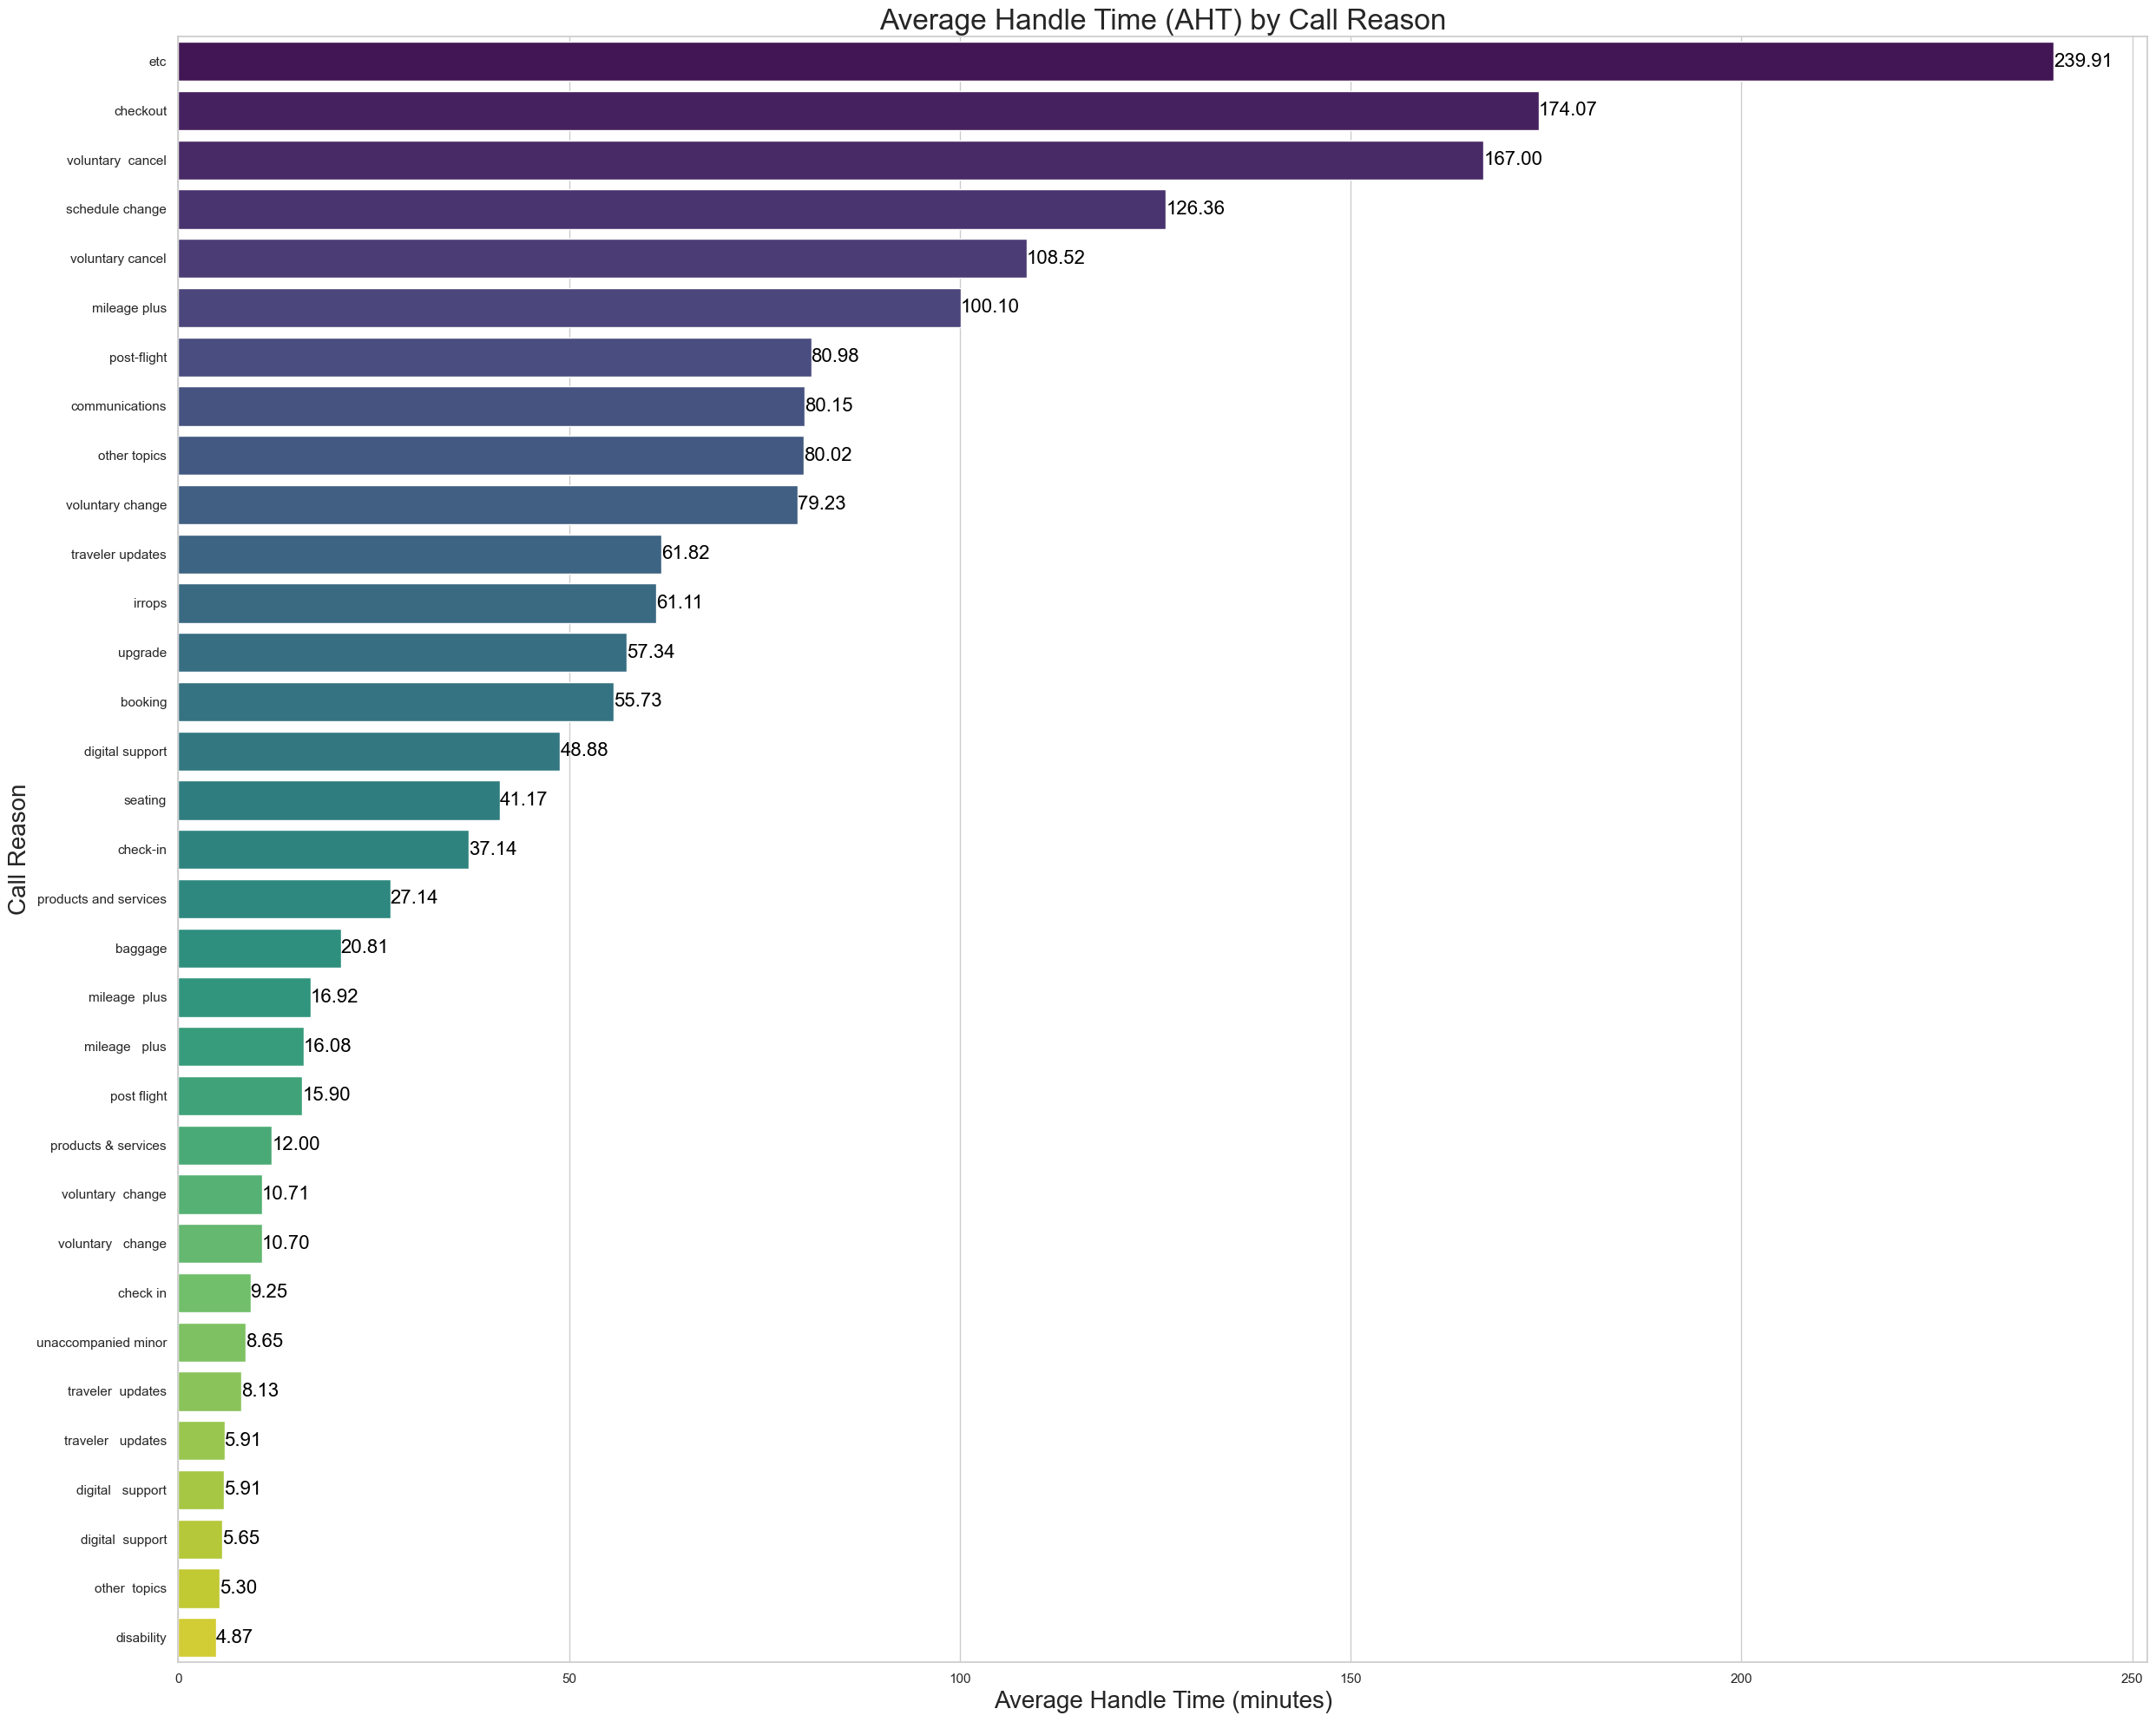

In [52]:

plt.figure(figsize=(25, 20))
aht_by_reason = df.groupby('primary_call_reason')['handle_time'].mean().reset_index()
aht_by_reason = aht_by_reason.sort_values(by='handle_time', ascending=False)


ax = sns.barplot(x='handle_time', y='primary_call_reason', data=aht_by_reason, palette='viridis')
plt.title('Average Handle Time (AHT) by Call Reason', fontsize=24)
plt.xlabel('Average Handle Time (minutes)', fontsize=20)
plt.ylabel('Call Reason', fontsize=20)


for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',   
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha='left',    
                va='center',  
                fontsize=16,  
                color='black') 

plt.tight_layout()
plt.show()


### 1) According to Bar Graph of AHT VS Call Reason , highest AHT of 239.91 min falls under category of other reasons not mentioned.
### 2) But 2nd Highest AHT of 174.07 in Checkout Reasons tells us most of calls are centred around discussion of Checkout related queries.
### 3) Least AHT OF 4.87 min falls under Disability Reason i.e least people enquire for this reason.

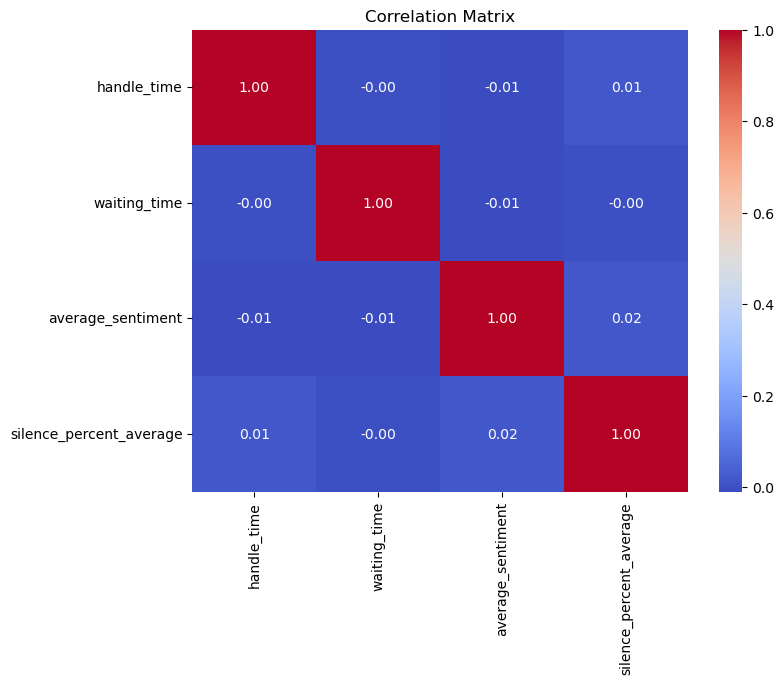

In [54]:
correlation_matrix = df[['handle_time', 'waiting_time', 'average_sentiment', 'silence_percent_average']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 1) Value of 1.00 shows positive correlation with the same columns values.
### 2) Value of A correlation of -0.00 indicates an extremely weak negative correlation, which is almost negligible. This suggests that there is virtually no linear relationship between waiting time and handle time.
### 3) A correlation of -0.01 also indicates a very weak negative correlation. This means that there is no meaningful linear relationship between average sentiment and handle time.
### 4) A correlation of 0.02 shows positive weak correlation between columns like average sentiment and silent percent average.

C:\Users\Aditi Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


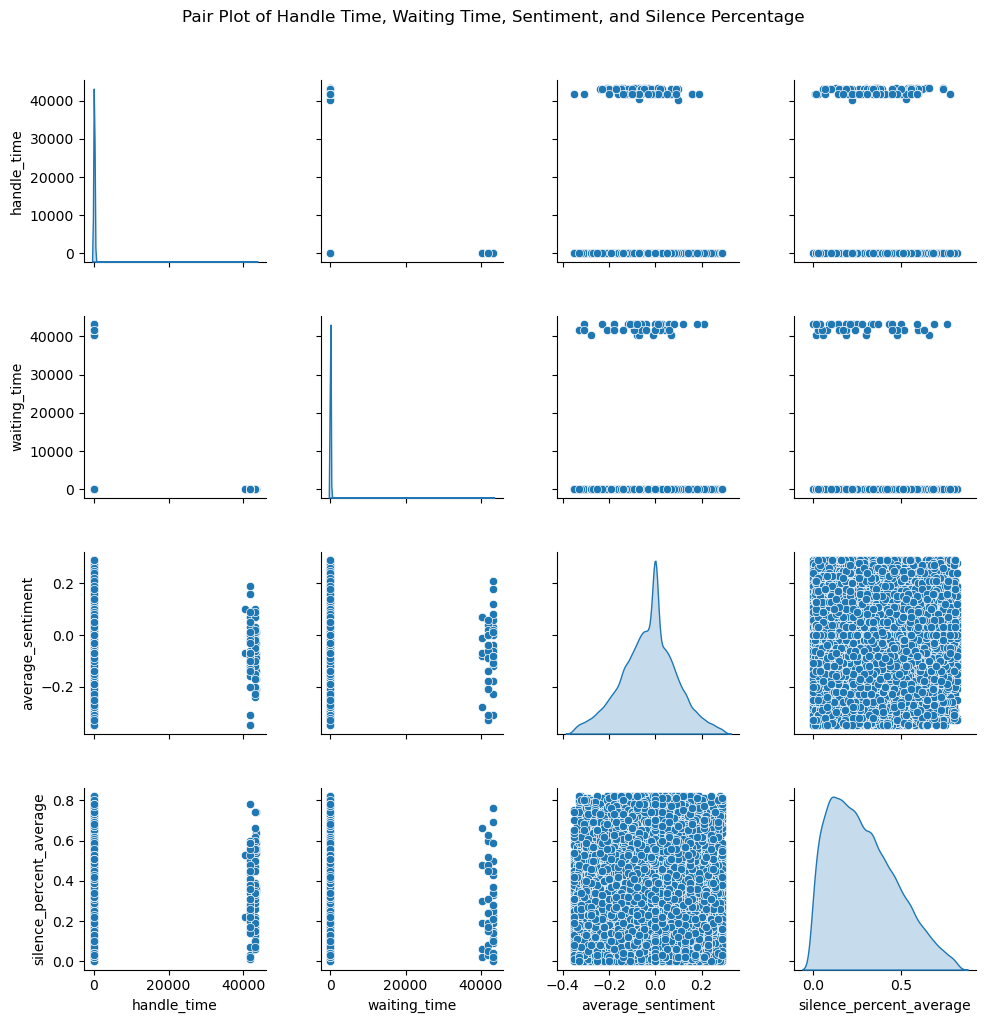

In [93]:
sns.pairplot(df[['handle_time', 'waiting_time', 'average_sentiment', 'silence_percent_average']], diag_kind='kde')
plt.subplots_adjust(top=0.95, wspace=0.3, hspace=0.3) 
plt.suptitle('Pair Plot of Handle Time, Waiting Time, Sentiment, and Silence Percentage', y=1.02)
plt.show()


## -> Pair Plot of Handle Time, Waiting Time, Sentiment, and Silence Percentage shows relationships between AHT And AST with Sentiment Columns.

<Figure size 1200x600 with 0 Axes>

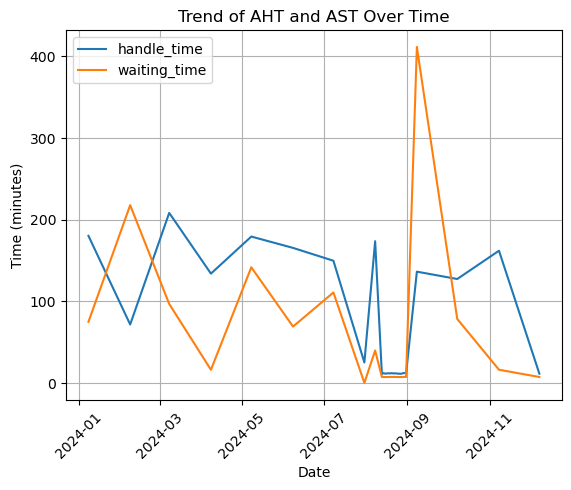

In [109]:

df['call_day'] = pd.to_datetime(df['call_start_datetime']).dt.date


daily_trends = df.groupby('call_day')[['handle_time', 'waiting_time']].mean()


plt.figure(figsize=(12, 6))
daily_trends.plot()
plt.title('Trend of AHT and AST Over Time')
plt.xlabel('Date')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Line Graph of Waiting  and Handle Time  Vs Date
### 1)Highest Waiting Time(AST) of above 400 minutes is between September and November 2024.
### 2)Highest Handle Time(AHT) of above 200 minutes is between March and May 2024.

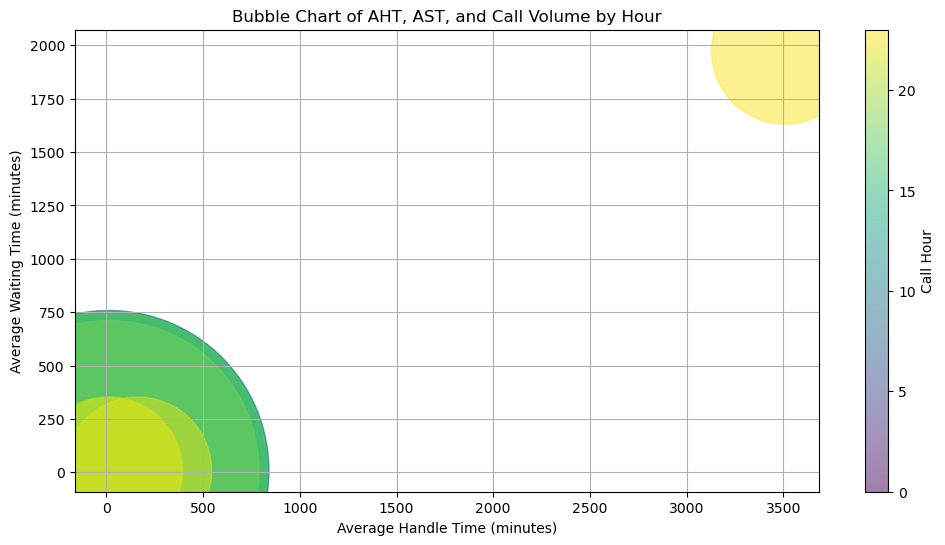

In [110]:

volume_data = df.groupby('call_hour').agg({'handle_time': 'mean', 'waiting_time': 'mean', 'call_id': 'count'}).reset_index()
volume_data.rename(columns={'call_id': 'call_volume'}, inplace=True)


plt.figure(figsize=(12, 6))
plt.scatter(volume_data['handle_time'], volume_data['waiting_time'], s=volume_data['call_volume']*10, alpha=0.5, c=volume_data['call_hour'], cmap='viridis')
plt.colorbar(label='Call Hour')
plt.title('Bubble Chart of AHT, AST, and Call Volume by Hour')
plt.xlabel('Average Handle Time (minutes)')
plt.ylabel('Average Waiting Time (minutes)')
plt.grid(True)
plt.show()


## Bubble Chart of AHT and AST and call volume by hour.

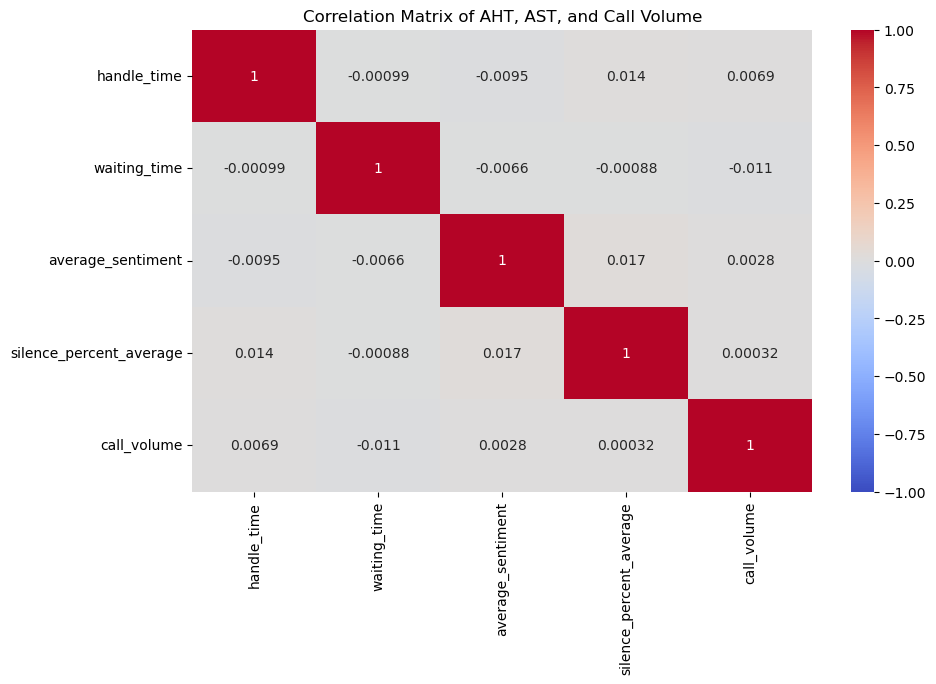

In [111]:

df['call_volume'] = df.groupby('call_day')['call_id'].transform('count')
correlation_matrix = df[['handle_time', 'waiting_time', 'average_sentiment', 'silence_percent_average', 'call_volume']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of AHT, AST, and Call Volume')
plt.show()


## Heatmap of Handle Time, Waiting Time, Sentiment columns and Call Volume.
### 1) Negative Correlation of -0.00099 between handle time and waiting time shows little  relation between columns.
### 2) Average sentiment has negative relation and silent percent average has postive relation with handling time showing silence in call duration contributing to long AHT.
### 3)Also call volume and handle time also shows positive relation showing as the number of calls increases AHT increases.
### 4) All Average Sentiment , Silent percent average and Call Volumes shows negative relation with waiting time i.e one increases another decreases.

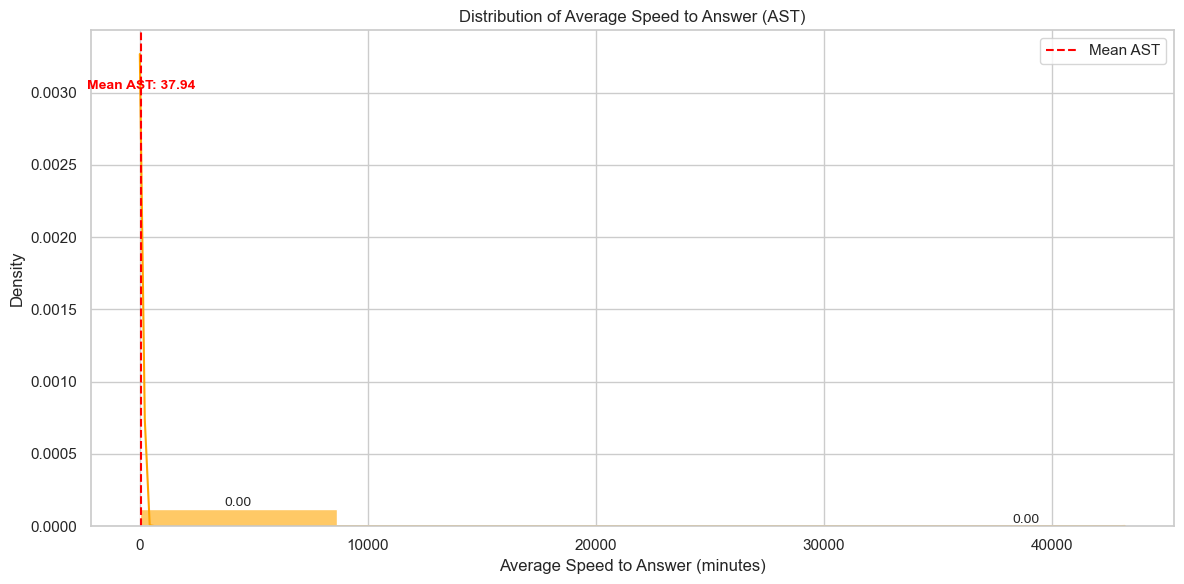

In [57]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['waiting_time'], bins=5, kde=True, color='orange', stat='density', alpha=0.6)
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('Average Speed to Answer (minutes)')
plt.ylabel('Density')


mean_waiting_time = df['waiting_time'].mean()


plt.axvline(mean_waiting_time, color='red', linestyle='--', label='Mean AST')


for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        ax.text(patch.get_x() + patch.get_width() / 2, height, 
                f'{height:.2f}', ha='center', va='bottom', fontsize=10)


plt.text(mean_waiting_time, ax.get_ylim()[1] * 0.9, 
         f'Mean AST: {mean_waiting_time:.2f}', 
         color='red', ha='center', va='top', fontsize=10, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


### 1)The histogram shows that the Average Speed to Answer (AST) is predominantly clustered between 0 and less than 10,000 minutes, but the mean AST is of 37.94 minutes raises concerns about potential inefficiencies in the call center's operations. Such a high average indicates that many customers have to wait longer, there are likely outliers contributing to lengthy waiting times.
### 2)With a density very less between 0 and 0.0005  falling within this AST range, the call center is potentially burdened by a subset of calls that require excessive time to resolve. This could indicate issues such as complex customer inquiries, inadequate agent training, or insufficient self-service options, which could lead to frustration for both agents and customers.
### 3)By identifying the root causes of prolonged handle times, such as common call types or customer issues, the organization can implement targeted strategies to streamline processes, enhance agent training, and improve self-service options. This proactive approach could help in reducing the mean AST and improving overall customer satisfaction.

<Figure size 1200x600 with 0 Axes>

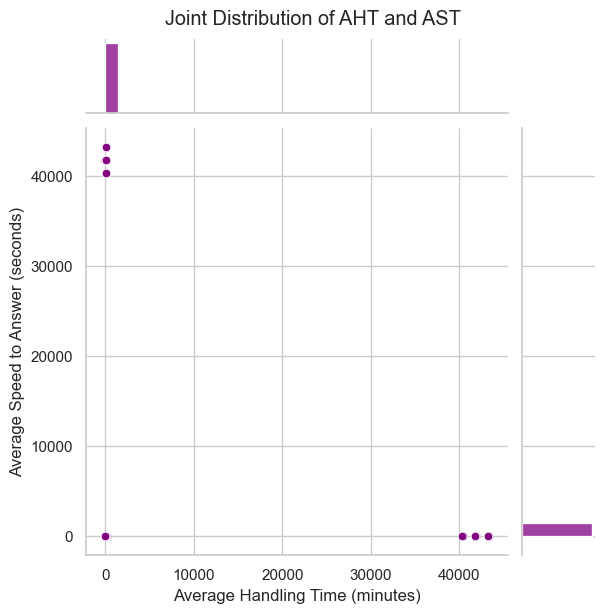

In [31]:

plt.figure(figsize=(12, 6))
sns.jointplot(x='handle_time', y='waiting_time', data=df, kind='scatter', color='purple', marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Joint Distribution of AHT and AST', y=1.02)
plt.xlabel('Average Handling Time (minutes)')
plt.ylabel('Average Speed to Answer (seconds)')
plt.show()




## ->Joint Distribution of AHT and AST

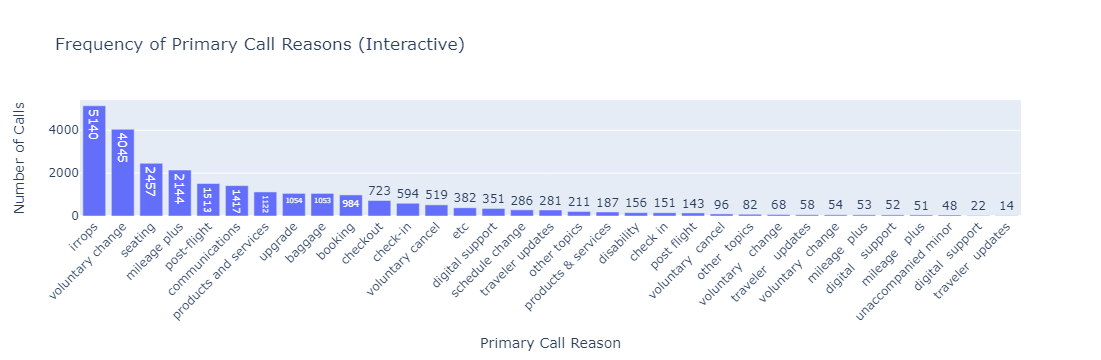

In [60]:
import plotly.express as px


fig = px.bar(
    x=call_reason_counts.index, 
    y=call_reason_counts.values,
    title='Frequency of Primary Call Reasons (Interactive)',
    labels={'x': 'Primary Call Reason', 'y': 'Number of Calls'},
    text=call_reason_counts.values
)


fig.update_layout(
    xaxis_title='Primary Call Reason',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45
)


fig.show()


### 1) Bar Graph shows maximum number of calls for irrops reason.
### 2) Followed by Voluntary change(4045),seating(2457) etc.
### 3) Least Number of calls are made for traveller updates reason i.e 14 only.

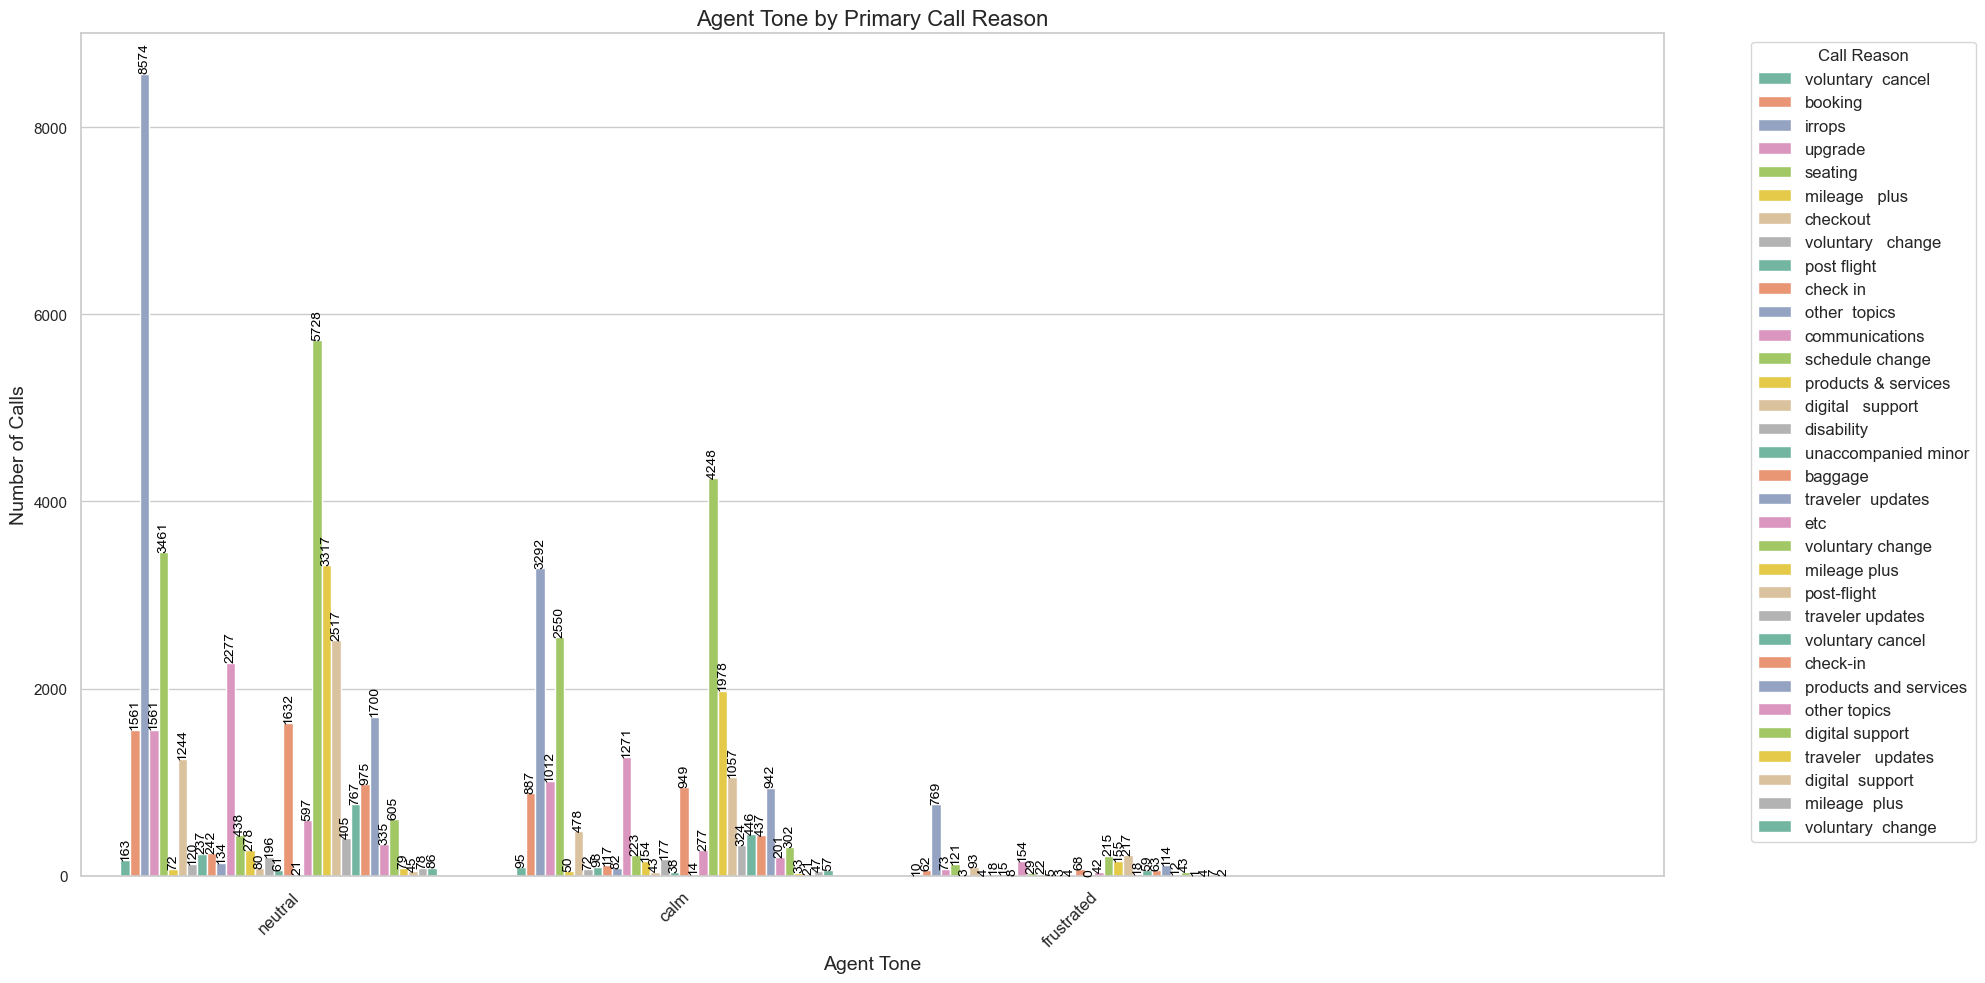

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

palette = sns.color_palette("Set2", n_colors=len(df['primary_call_reason'].unique()))


plt.figure(figsize=(20, 10))
ax = sns.countplot(x='agent_tone', hue='primary_call_reason', data=df, palette=palette)
plt.title('Agent Tone by Primary Call Reason', fontsize=16)
plt.xlabel('Agent Tone', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Call Reason', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

g
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height + 2), 
                ha='center', va='bottom', 
                fontsize=10, 
                rotation=90,  
                color='black')


plt.xlim(-0.5, len(df['agent_tone'].unique()) - 0.5) 

plt.tight_layout()  
plt.show()


### 1) According to CountPlot, the highest number of calls(8574) is made for irrops reasons when agent's tone is neutral.
### 2) Highest number of calls(4248)  in Calm tone of agent are made for voluntary change reason.
### 3) Highest number of calls(769)  in frustrated tone of agent are made for irrops reason.

<Figure size 1400x700 with 0 Axes>

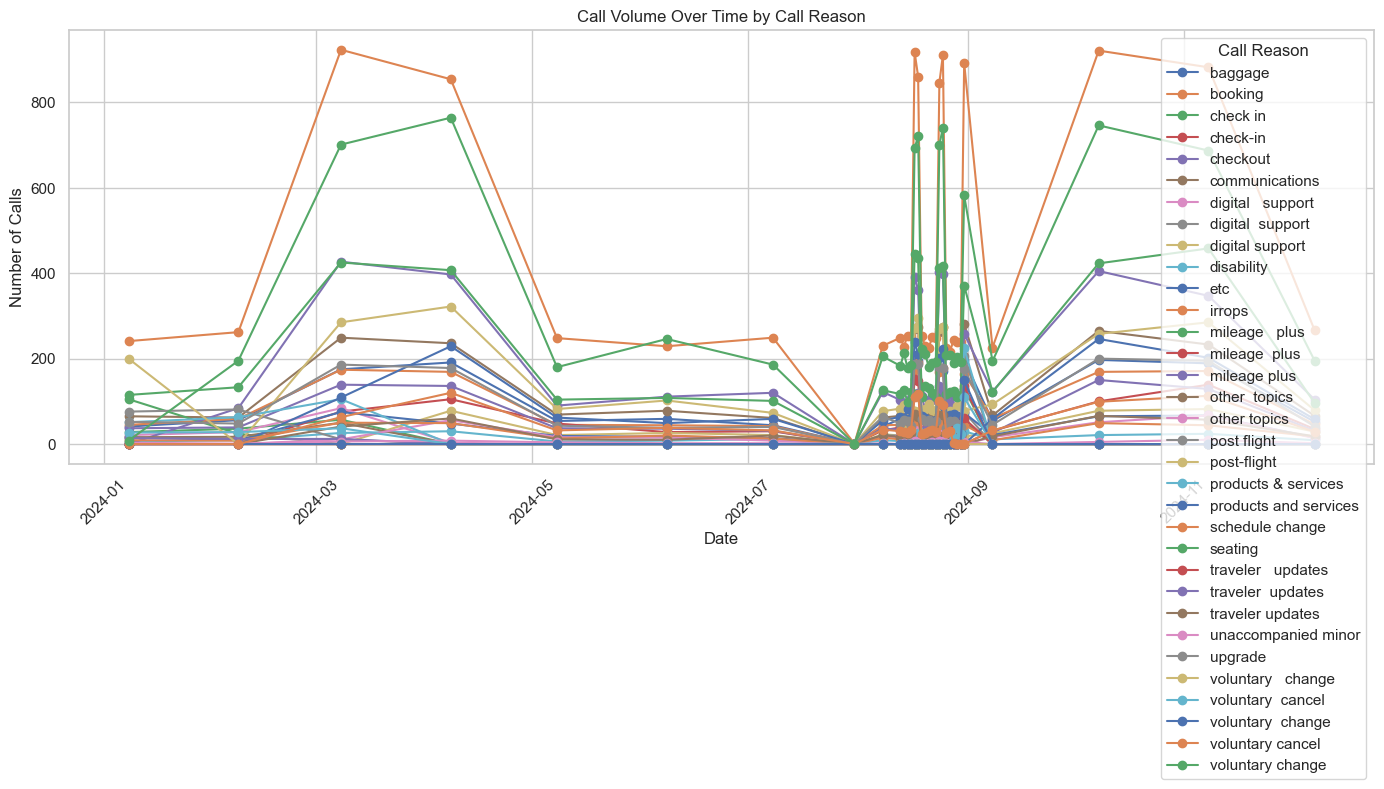

In [25]:
df['call_date'] = pd.to_datetime(df['call_start_datetime']).dt.date
call_volume_over_time = df.groupby(['call_date', 'primary_call_reason']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
call_volume_over_time.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Call Volume Over Time by Call Reason')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend(title='Call Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## -> Time plot of Date Vs Number of calls wrt to call reason.

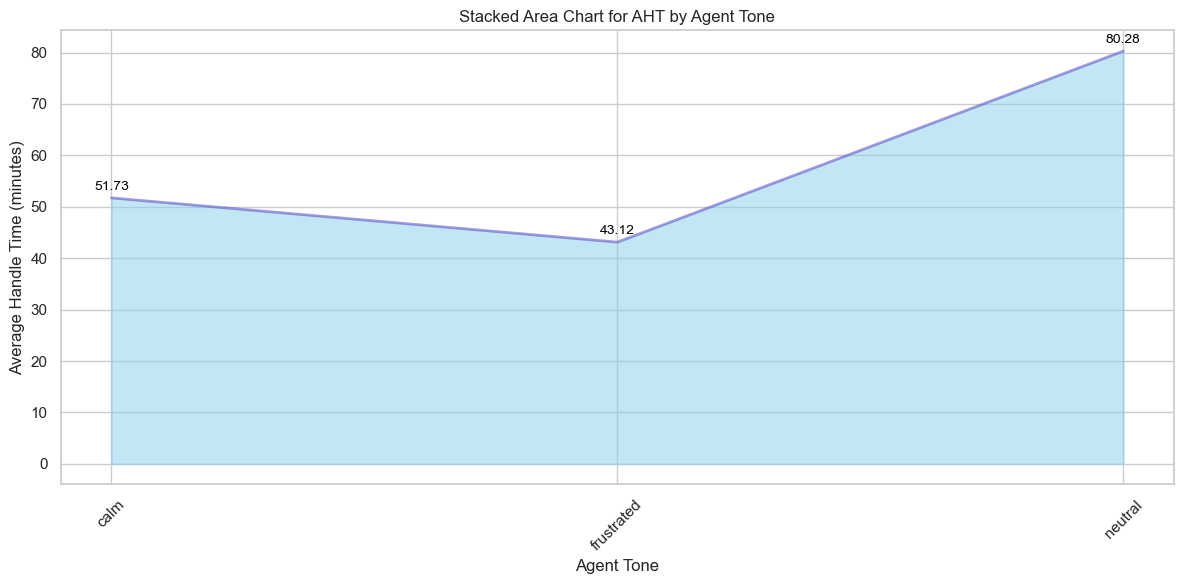

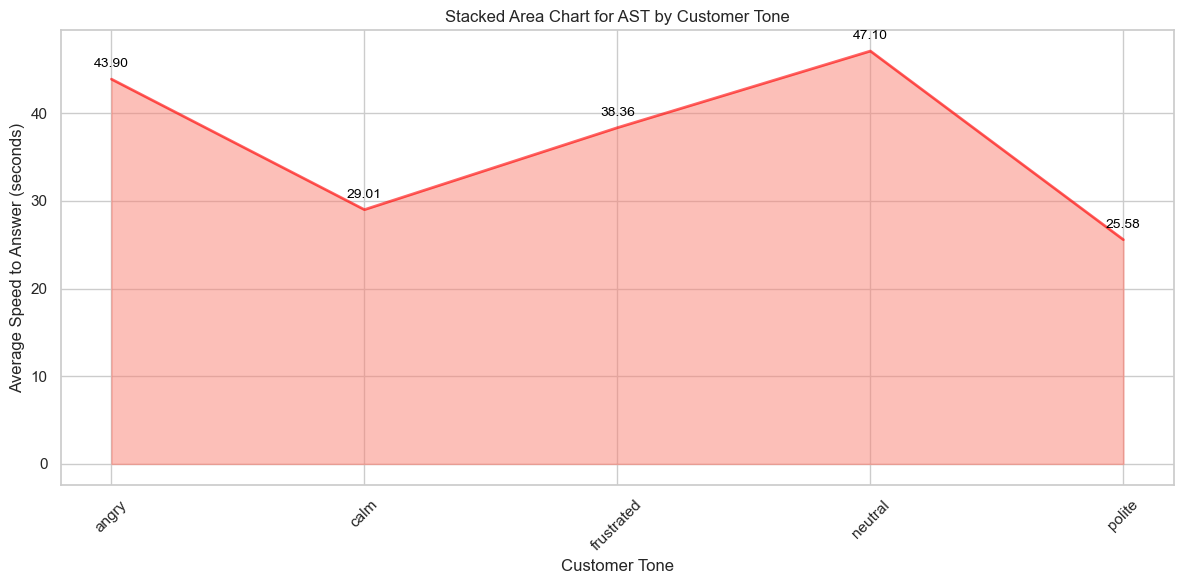

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


aht_area = df.groupby('agent_tone')['handle_time'].mean().reset_index()
ast_area = df.groupby('customer_tone')['waiting_time'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.fill_between(aht_area['agent_tone'], aht_area['handle_time'], color='skyblue', alpha=0.5)
plt.plot(aht_area['agent_tone'], aht_area['handle_time'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Stacked Area Chart for AHT by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)


for i, v in enumerate(aht_area['handle_time']):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.fill_between(ast_area['customer_tone'], ast_area['waiting_time'], color='salmon', alpha=0.5)
plt.plot(ast_area['customer_tone'], ast_area['waiting_time'], color='red', alpha=0.6, linewidth=2)
plt.title('Stacked Area Chart for AST by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Speed to Answer (seconds)')
plt.xticks(rotation=45)


for i, v in enumerate(ast_area['waiting_time']):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### 1) According to shaded line chart, highest AHT(80.28 Minutes) is from neutral tone of agent.
### 2) Highest AST(47.10 Minutes) is from neutral tone of Customer.

In [55]:

most_frequent_reason = df['primary_call_reason'].value_counts().idxmax()
least_frequent_reason = df['primary_call_reason'].value_counts().idxmin()

aht_most_frequent = df[df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
aht_least_frequent = df[df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

print(f'Average Handling Time for Most Frequent Reason: {aht_most_frequent:.2f} minutes')
print(f'Average Handling Time for Least Frequent Reason: {aht_least_frequent:.2f} minutes')
print(f'Percentage Difference between AHTs: {percentage_difference:.2f}%')

Average Handling Time for Most Frequent Reason: 62.05 minutes
Average Handling Time for Least Frequent Reason: 3.00 minutes
Percentage Difference between AHTs: 1968.38%


## ->Percentage Difference between Most Frequent and Least Frequent Call Reasons but Difference between AHTs: 1968.38% is considered wrong percentage.

In [57]:

most_frequent_reason = df['primary_call_reason'].value_counts().idxmax()
least_frequent_reason = df['primary_call_reason'].value_counts().idxmin()

aht_most_frequent = df[df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
aht_least_frequent = df[df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()


absolute_difference = aht_most_frequent - aht_least_frequent


percentage_difference = (absolute_difference / aht_most_frequent) * 100


print(f'Average Handling Time for Most Frequent Reason: {aht_most_frequent:.2f} minutes')
print(f'Average Handling Time for Least Frequent Reason: {aht_least_frequent:.2f} minutes')
print(f'Absolute Difference between AHTs: {absolute_difference:.2f} minutes')
print(f'Percentage Difference (relative to Most Frequent AHT): {percentage_difference:.2f}%')


Average Handling Time for Most Frequent Reason: 62.05 minutes
Average Handling Time for Least Frequent Reason: 3.00 minutes
Absolute Difference between AHTs: 59.05 minutes
Percentage Difference (relative to Most Frequent AHT): 95.17%


### Percentage Difference (relative to Most Frequent AHT)is  95.17% according to absolute difference and wrt to most frequent Reason.

In [27]:

df['cleaned_transcript'] = df['call_transcript'].str.lower()  # Convert to lowercase
df['cleaned_transcript'] = df['cleaned_transcript'].str.replace('[^\w\s]', '')  # Remove punctuation
df['cleaned_transcript'] = df['cleaned_transcript'].str.replace('\d+', '')  # Remove digits


## Cleaning transcripts

In [28]:

from collections import Counter


words = ' '.join(df['cleaned_transcript']).split()
word_counts = Counter(words)

common_words = word_counts.most_common(20)
print("Most common words in transcripts:", common_words)


Most common words in transcripts: [('to', 1123356), ('the', 1110817), ('i', 1040700), ('you', 934329), ('for', 737192), ('a', 735686), ('your', 635866), ('agent:', 527108), ('that', 520685), ('and', 516807), ('flight', 489602), ('me', 470716), ('customer:', 463455), ('is', 447282), ('on', 351290), ('have', 339453), ('of', 306398), ('let', 301776), ('it', 300400), ('can', 280543)]


## Extracting keywords or phrases that may indicate self-solvable issues and also getting the most common words from call transcripts.

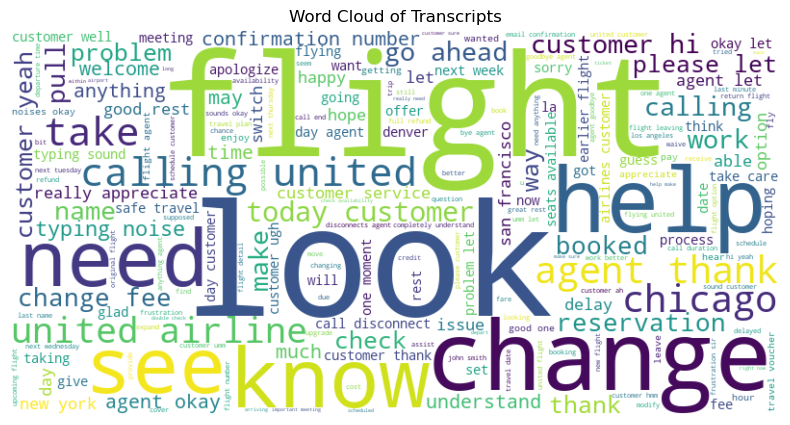

In [70]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_transcript']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Transcripts')
plt.show()


## Word cloud to visualize common terms in transcripts.

In [72]:

frequent_issues = call_reason_counts[call_reason_counts > 50]  
print("Frequent Issues that could be self-serviced:", frequent_issues)


proposed_improvements = """
1. Enhance IVR menu options to directly address common issues such as password resets, flight status inquiries, and simple billing questions.
2. Implement a dedicated section in the IVR for frequent callers to solve their issues quickly without waiting for an agent.
3. Offer clearer prompts and instructions in the IVR to guide customers toward self-service solutions.
"""

print(proposed_improvements)


Frequent Issues that could be self-serviced: primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating    

## Propose improvements based on frequent issues.
### 1)Enhance IVR menu options to directly address common issues such as password resets, flight status inquiries, and simple billing questions.
### 2)Implement a dedicated section in the IVR for frequent callers to solve their issues quickly without waiting for an agent.
### 3)Offer clearer prompts and instructions in the IVR to guide customers toward self-service solutions.